# U.S. Wildfires from 2000 to 2010 Analysis Project
## Introduction

#### The original dataset from the Carolina Data Challenge in 2023 contained over 900k+ records of wildfire incidents from 2000 to 2010 with close to 40 columns for attributes. 


## Setting up DataFrame

In [ ]:
# Installing & Importing necessary libraries
# %pip install pandas numpy plotly seaborn matplotlib scikit-learn

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Loading the dataset into a pandas dataframe
df = pd.read_excel("..\\Excel Dataset\\2023CDCNaturalFiresDataset.xlsx")

# Display the number of data
row_count = len(df)         # could be len(df.index) or df.shape[0]
print(f'Number of data: {row_count}')

Number of data: 937972


In [3]:
# Displaying the dataframe
df.head(10)

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DOY,CONT_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,2010,139,NaN,NaN,NaN,2,Equipment Use,70.0,C,36.766944,-121.303056,CA
1,2010,159,NaN,NaN,NaN,9,Miscellaneous,0.5,B,36.776944,-121.311111,CA
2,2010,163,NaN,NaN,NaN,9,Miscellaneous,0.1,A,36.856111,-121.381111,CA
3,2010,165,NaN,NaN,NaN,9,Miscellaneous,0.1,A,36.818056,-121.391111,CA
4,2010,192,NaN,NaN,NaN,9,Miscellaneous,1.0,B,36.883056,-121.561944,CA
5,2010,210,NaN,NaN,NaN,5,Debris Burning,0.3,B,36.936111,-121.388056,CA
6,2010,254,NaN,NaN,NaN,2,Equipment Use,0.5,B,36.758056,-121.503056,CA
7,2010,75,NaN,NaN,NaN,9,Miscellaneous,0.1,A,36.818056,-121.391111,CA
8,2010,121,NaN,NaN,NaN,9,Miscellaneous,1.0,B,36.883056,-121.561944,CA
9,2010,174,NaN,NaN,NaN,9,Miscellaneous,16.0,C,35.953056,-120.866944,CA


## Remarks on the Dataset
### Identifying Attributes of Wildfire
- The original dataset contained close to 40 Attributes/Features.
- **Only 12 pertinent attributes were picked out of 40 for this analysis.** <br>
- **Quantitative variables**: Fire Year, Discovery Day of Year, Discovery Time of Day, Containment Day of Year, Containment Time of Day, Fire Size, Latitude, Longitidue <br>
- **Qualitative variables**: Status Cause Code, Status Cause Description, Fire Size Class, State
<br>

### Observation on the values of the dataset
- **Day of Year was recorded on a scale of 365 days or 366 days during Leap Years.** 
- **Time of Day was recorded numerically using up to 4 digits.**
    - 5 represented 00:05 
    - 12 represented 00:12 
    - 333 represented 3:33 
    - 1859 represented 18:59
- Fire Size was recorded in acres.



## Identifying Empty Cells

In [4]:
# Checking for null values, expressed as a percentage of data
(df.isnull().sum()) / len(df) * 100

FIRE_YEAR            0.000000
DISCOVERY_DOY        0.000000
DISCOVERY_TIME      56.215751
CONT_DOY            57.883604
CONT_TIME           60.703944
STAT_CAUSE_CODE      0.000000
STAT_CAUSE_DESCR     0.000000
FIRE_SIZE            0.000000
FIRE_SIZE_CLASS      0.000000
LATITUDE             0.000000
LONGITUDE            0.000000
STATE                0.000000
dtype: float64

- **Empty cells were found in each attribute columns to determine usability for the analysis.**
    - About 56% of Discovery Time is missing.
    - About 57% of Containment Day of Year is missing.
    - About 61% of Containment Time is missing.

## Choosing Attributes for Analysis
### Correlation Heatmap
- **Correlation Heatmap was used to scan if there are any noticeable interactions between two variables.**
- **The levels of categorical (qualitative) variables should be coded/factored for correlation.**
    - Levels of Status Cause Code & State will be factored into numerical values.
    - Fire Size Status can be evaluated by Fire Size & Status Cause Description can be evaluated by factored Status Cause Code.


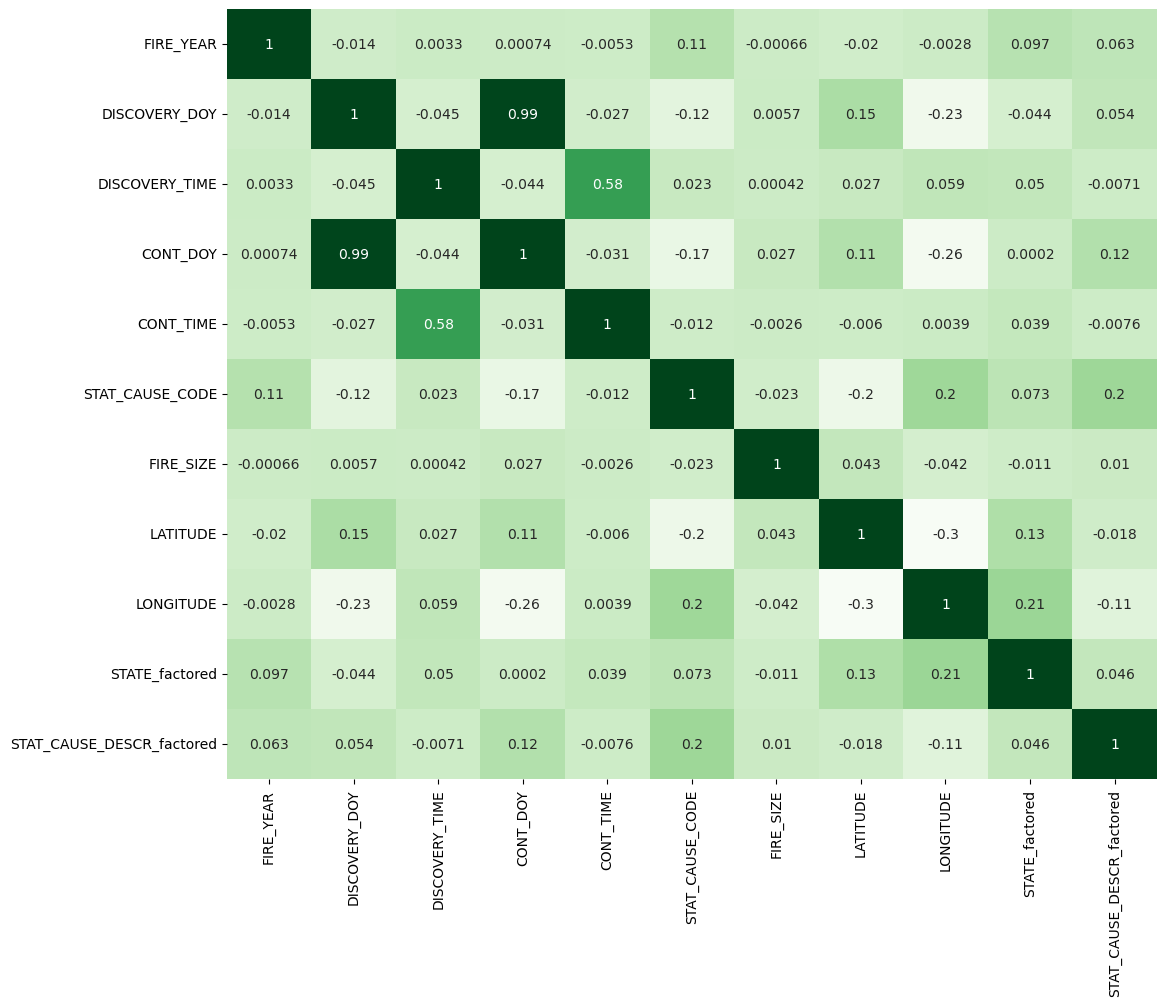

In [5]:
# Label/level encoding to include categorical data in the heatmap
df['STATE_factored'] = df['STATE'].astype('category').cat.codes
df['STAT_CAUSE_DESCR_factored'] = df['STAT_CAUSE_DESCR'].astype('category').cat.codes

# Selecting numeric columns for the heatmap
numeric_df = df.select_dtypes(include=[np.number])

# Creating correlation heatmap using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Greens', cbar=False)

plt.show()

### Remarks on the Correlation Heatmap
- There seems to be some level of correlation between the Discovery Time and Containment Time
    - **It would be interesting to see the difference between Discovery Time and Containment Time as a new potential variable in describing wildfire.** 
    - Because both of them were recorded in digits, and not as an actual time, appropriate conversion should be performed.
    - However, as there are a lot of data missing in these columns, this will be analyzed at the end with a valid subset of the current dataset.
- **The caveat of this correlation map is that better variable selection and regression modeling process should be used to determine the significance of variables and their order and interactions.**
    - Looking to expand on this via statistical analysis using R.

## Subjective Variable Selections
### 4 perspectives were chosen for the analysis.
### 1. Number of Wildfire Incidents by Months
- **Interested to see which month had the most number of wildfire incidents from 2000 to 2010.**
- Requires feature engineering DOY into a new attribute, Months.

### 2. Fire Size across Months
- **Interested to see which month had most severe cases of wildfire from 2000 to 2010.**

### 3. Fire Size across Years
- **Interested to see which year had the most area of land impacted by wildfires from 2000 to 2010.**

### 4. Fire Containment Time across Years
- **Interested to see which year most struggled with fire containment from 2000 to 2010.**
- Will be using a subset of data due to presence of empty records.
- Requires data engineering, involving transformation of time records. 

## 1. Number of Wildfire Incidents by Months
Perspective chosen to see which month had the most number of wildfire incidents from 2000 to 2010. 
### Feature Engineering
- DOY was recorded as a number between 1 and 365 or 366 depending on Leap years. 
- **For the analysis, they had to be converted into Months (January - December)**

In [6]:
# Defining function to get the month of year based on the year
# Step 1: Check if the year is a leap year
# Step 2: Adding the number of days to the first day of the base year (2000 or 2001)
# Step 3: Trasforming numerical month to string month using .strftime('%B')

def get_month(year, doy):   
    if year % 4 == 0:           
        return (datetime(2000,1,1) + timedelta(days=doy-1)).strftime('%B')        
    else:
        return (datetime(2001,1,1) + timedelta(days=doy-1)).strftime('%B')        
    
# Creating a DISCOVERY_Month field with correlating values to the DataFrame
df['DISCOVERY_Month'] = df.apply(lambda x: get_month(x['FIRE_YEAR'], x['DISCOVERY_DOY']), axis=1)
# Converting the DISCOVERY_Month field to a categorical field
df['DISCOVERY_Month'] = df['DISCOVERY_Month'].astype('category')

df['DISCOVERY_Month'].unique()


['May', 'June', 'July', 'September', 'March', ..., 'January', 'February', 'April', 'November', 'December']
Length: 12
Categories (12, object): ['April', 'August', 'December', 'February', ..., 'May', 'November', 'October', 'September']

In [7]:
print(get_month(2000, 366))     # 366 in year 2000 should return December
print(get_month(2001, 365))     # 365 in year 2001 should return December
print(get_month(2001, 366))     # 366 in year 2001 should return January


December
December
January


In [8]:
# Dropping the factored columns used for correlation heatmap if they exist
columns_to_drop = ['STATE_factored', 'STAT_CAUSE_DESCR_factored']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1, inplace=True)

df.head(10)

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DOY,CONT_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,DISCOVERY_Month
0,2010,139,NaN,NaN,NaN,2,Equipment Use,70.0,C,36.766944,-121.303056,CA,May
1,2010,159,NaN,NaN,NaN,9,Miscellaneous,0.5,B,36.776944,-121.311111,CA,June
2,2010,163,NaN,NaN,NaN,9,Miscellaneous,0.1,A,36.856111,-121.381111,CA,June
3,2010,165,NaN,NaN,NaN,9,Miscellaneous,0.1,A,36.818056,-121.391111,CA,June
4,2010,192,NaN,NaN,NaN,9,Miscellaneous,1.0,B,36.883056,-121.561944,CA,July
5,2010,210,NaN,NaN,NaN,5,Debris Burning,0.3,B,36.936111,-121.388056,CA,July
6,2010,254,NaN,NaN,NaN,2,Equipment Use,0.5,B,36.758056,-121.503056,CA,September
7,2010,75,NaN,NaN,NaN,9,Miscellaneous,0.1,A,36.818056,-121.391111,CA,March
8,2010,121,NaN,NaN,NaN,9,Miscellaneous,1.0,B,36.883056,-121.561944,CA,May
9,2010,174,NaN,NaN,NaN,9,Miscellaneous,16.0,C,35.953056,-120.866944,CA,June


<Axes: title={'center': 'Number of Fires Incidents by Month'}, xlabel='Months', ylabel='Number of Fires Incidents'>

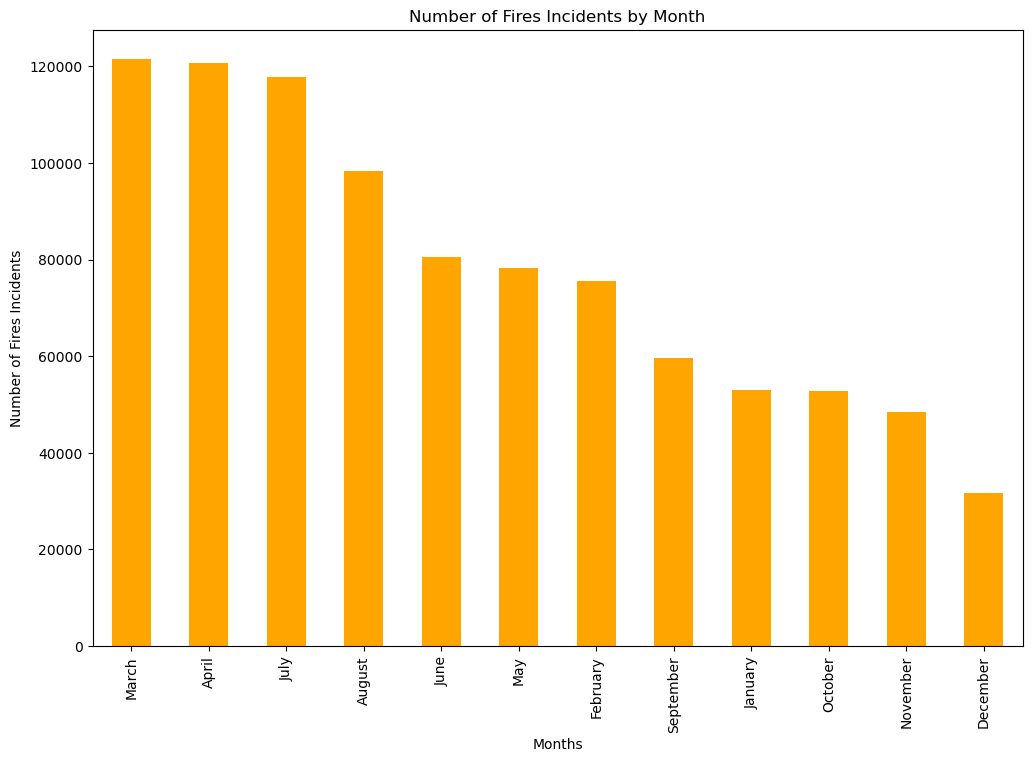

In [9]:
# Plotting the number of fires incidents by month
fire_count_by_month = pd.Series(df['DISCOVERY_Month']).value_counts()
fire_count_by_month.plot.bar(figsize=(12, 8), color='orange', title='Number of Fires Incidents by Month', xlabel = 'Months', ylabel='Number of Fires Incidents')

## Interpretation
- **From 2000 to 2010, March experienced the most cases of wildfire in the United States.** 
- **Based on the data from 2000 to 2010, preventative measures could be concentrated more on Spring and Summer months.**
- **Could be interesting to discover what factors are contributing to the increase of wildfires during the months of Spring and Summer.**

## 2. Fire Size Across Months
Perspective chosen to see which month had the most severe cases of wildfire from 2000 to 2010.

### Process Insight
- DOY was used as a primary feature to better indicate which day of the month wildfire occurred.
- Month label was used as an auxiliary index facilitate the visual representation. 

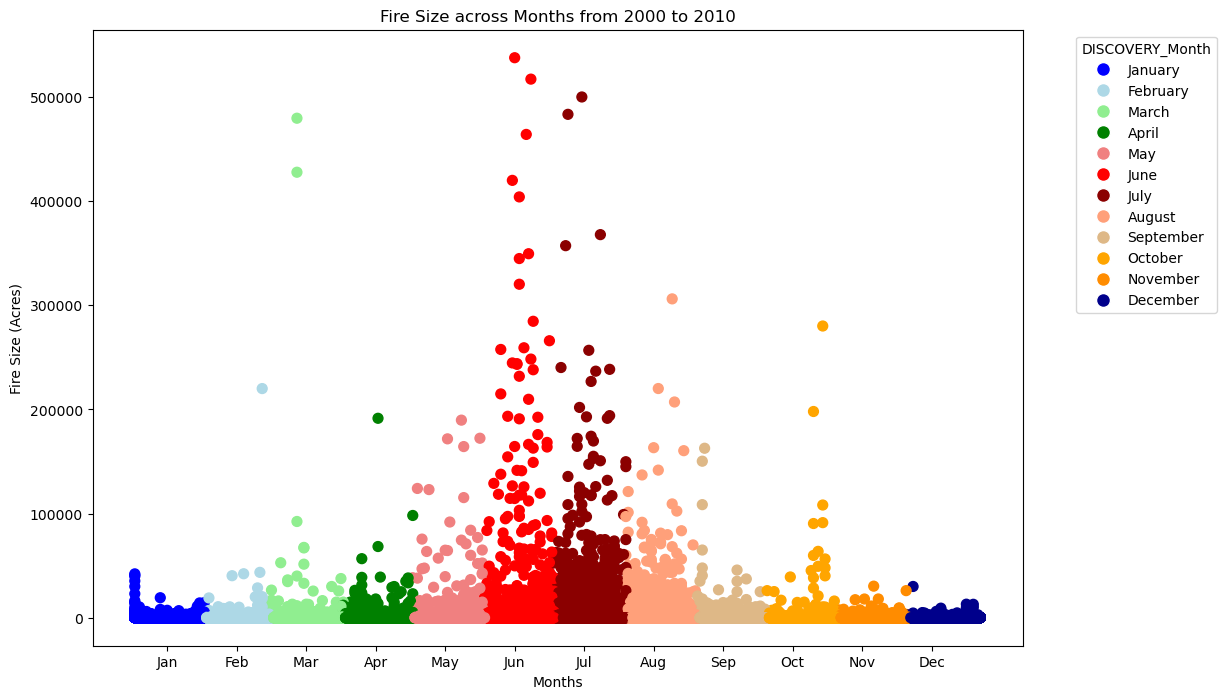

In [10]:
# Defining a custom color map for DISCOVERY_Month
month_colors = {
    'January': 'blue', 'February': 'lightblue', 'March': 'lightgreen', 'April': 'green', 'May': 'lightcoral',
    'June': 'red', 'July': 'darkred', 'August': 'lightsalmon',
    'September': 'burlywood', 'October': 'orange', 'November': 'darkorange',
    'December': 'darkblue'
}

# Mapping the colors to the DISCOVERY_Month column
colors = df['DISCOVERY_Month'].map(month_colors)

# Creating a scatter plot of Fire Size across Months
scatplot1 = df.plot.scatter(
    x='DISCOVERY_DOY',
    y='FIRE_SIZE',
    c=colors,
    s=50,
    figsize=(12, 8),
    title='Fire Size across Months from 2000 to 2010',
    xlabel='Months',
    ylabel='Fire Size (Acres)'
)

# Setting custom x-axis labels to display months
scatplot1.set_xticks([15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345])
scatplot1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Creating custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in month_colors.values()]
labels = month_colors.keys()
scatplot1.legend(handles, labels, title="DISCOVERY_Month", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## Interpretation
- **From 2000 and 2010, months of June and July experienced most severe cases of wildfire in terms of the fire size.**
- **Based on the data from 2000 to 2010, containment measures could be more concentrated on months of June and July.**

## 3. Number of Different Fire Sizes by Years 
- Perspective chosen to see which year had the most area of land impacted by wildfires from 2000 to 2010.

### Process Insight
- Fire Size is summed up to represent the total area of land impacted by wildfires
- Table of Fire Size Classification is provided to facilitate understanding

                   Range
Class                   
A         0 - 0.25 acres
B       0.26 - 9.9 acres
C        10 - 99.9 acres
D        100 - 299 acres
E        300 - 999 acres
F      1000 - 4999 acres
G            5000+ acres


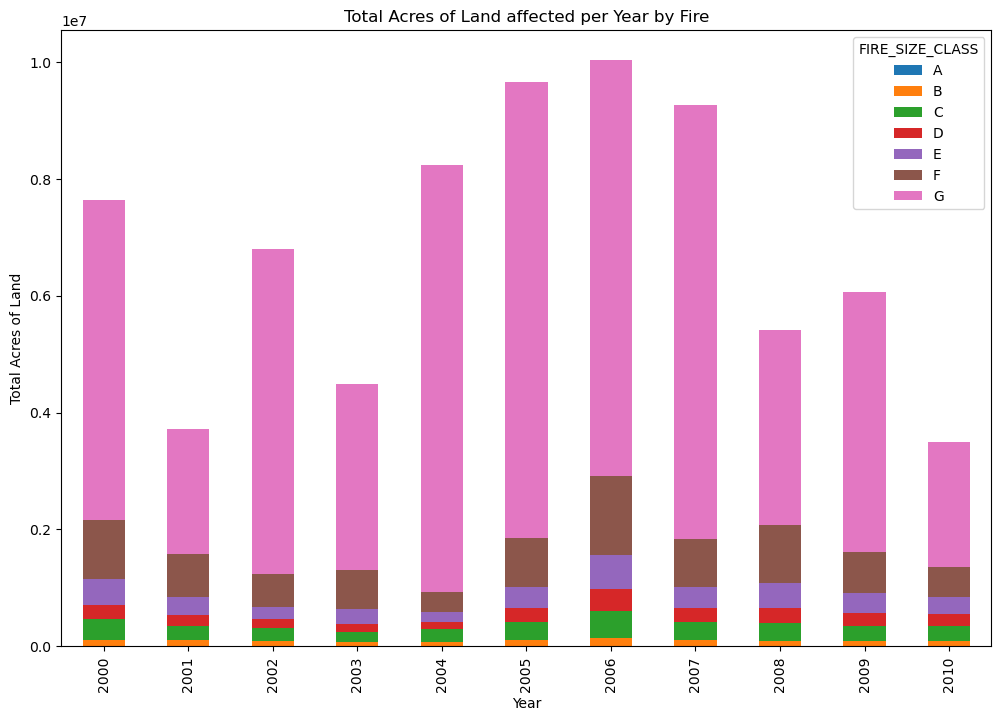

In [11]:
# Creating a visual representation of the fire size classes
fire_size_class_ranges = {
    'A': '0 - 0.25 acres',
    'B': '0.26 - 9.9 acres',
    'C': '10 - 99.9 acres',
    'D': '100 - 299 acres',
    'E': '300 - 999 acres',
    'F': '1000 - 4999 acres',
    'G': '5000+ acres'
}

# Displaying the fire size class ranges as a table without the numerical index
fire_size_class_df = pd.DataFrame(list(fire_size_class_ranges.items()), columns=['Class', 'Range'])
fire_size_class_df = fire_size_class_df.set_index('Class')
print(fire_size_class_df)

# Plot the bar graph
df2 = df.groupby(['FIRE_YEAR', 'FIRE_SIZE_CLASS'])['FIRE_SIZE'].sum()
df2 = df2.unstack('FIRE_SIZE_CLASS')
ax = df2.plot.bar(stacked=True, figsize=(12, 8), title='Total Acres of Land affected per Year by Fire')
ax.set_xlabel('Year')
ax.set_ylabel('Total Acres of Land')


plt.show()

In [12]:
df2.head(11)

FIRE_SIZE_CLASS,A,B,C,D,E,F,G
FIRE_YEAR,,,,,,,
2000,3841.705000,110961.460000,343974.4700,253745.34000,431962.37000,1.010948e+06,5.484065e+06
2001,3736.189000,95784.805000,245008.6300,192025.37000,312184.21000,7.238484e+05,2.151485e+06
2002,3284.073759,84405.844000,228567.2700,148692.26000,214963.91000,5.511827e+05,5.572162e+06
2003,3276.576580,63196.299000,179620.9900,141127.69999,250288.92999,6.662669e+05,3.179796e+06
2004,3232.068990,69260.065000,221212.3300,124911.17996,169170.62999,3.442183e+05,7.302204e+06
2005,3422.544000,99821.766000,318205.1660,235078.88002,357425.45000,8.375464e+05,7.813605e+06
2006,4126.796600,128457.234000,469543.0110,369433.64996,589581.75999,1.352452e+06,7.129904e+06
2007,4025.069000,98987.047000,310414.8420,237212.38997,356458.86998,8.251052e+05,7.433225e+06
2008,3387.911960,88765.080560,301234.3743,266376.32999,420646.64997,9.886740e+05,3.337448e+06


## Interpretation
- **Based on the data from 2000 to 2010, wildfire impacted land the most during 2004 and 2007.**
- **However, after 2007, the data shows significant decrease in the total area impacted by wildfire.**
- **It would be interesting to find what measures were implemented after 2007 that contributed to confining area of land impacted by wildfires**

## 4. Fire Containment Time across Years
- Perspective chosen to see which year had the most struggle to contain wildfires from 2000 to 2010.
- Will be using a subset of data due to presence of empty records.
- Requires data engineering, involving transformation of time records. 

### Feature Engineering
- **The recorded values of time needed to be formatted into appropriate units of time before calculating the difference between the containment time and discovery time.**
- The recorded values are stored as float-type in the dataframe.
- Ranging from 1 to 2359
- **In addition, the difference in Discovery Day and Containment Day should be accounted for in a unit of hours**

In [13]:
df_fire_contained = df.dropna(subset=['DISCOVERY_TIME', 'CONT_DOY', 'CONT_TIME'])
df_fire_contained.head()


,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DOY,CONT_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,DISCOVERY_Month
1388,2010,135,639.0,136.0,639.0,5,Debris Burning,0.2,A,64.116669,-145.666672,AK,May
1389,2010,135,613.0,136.0,613.0,5,Debris Burning,0.1,A,64.066666,-145.616669,AK,May
1392,2010,135,832.0,136.0,834.0,5,Debris Burning,0.2,A,61.583332,-149.550003,AK,May
1407,2010,174,1838.0,179.0,2320.0,1,Lightning,2777.0,F,65.760834,-162.574448,AK,June
1463,2010,280,638.0,283.0,645.0,13,Missing/Undefined,0.1,A,64.900002,-147.733337,AK,October


In [14]:
print(f'Number of data: {len(df_fire_contained)}')

Number of data: 368015


In [15]:
# Defining a function to format recorded values of time into proper time format
def format_time(time_record):
    time_int = int(time_record)     # used to format possible float values in the dataframe into integer values
    time_str = str(time_int)        # used to take advantage of string slicing

    if len(time_str) == 1:
        time_str = '00:0' + time_str[:1]
    elif len(time_str) == 2:
        time_str = '00:' + time_str[:2]
    elif len(time_str) == 3:
        time_str = '0' + time_str[:1] + ':' + time_str[1:]
    elif len(time_str) == 4:
        time_str = time_str[:2] + ':' + time_str[2:]

    time_str_final = time_str + ':00'
    time_obj = datetime.strptime(time_str_final, '%H:%M:%S')
    return time_obj.time()

# testing the function
print(format_time(1))       # should return 00:01:00
print(format_time(10))      # should return 00:10:00
print(format_time(520))     # should return 05:20:00
print(format_time(1359))    # should return 13:59:00


00:01:00
00:10:00
05:20:00
13:59:00


In [16]:
# Converting day of year to a valid date
def get_valid_date(year, day_of_year):
	return datetime(year, 1, 1) + timedelta(days=day_of_year - 1)

def get_datetime_obj(year, day_of_year, time_float):
    date = get_valid_date(year, day_of_year)
    time = format_time(time_float)
    return datetime.combine(date, time)

# Testing the function
print(get_datetime_obj(2000, 1, 1))         # should return 2000-01-01 00:01:00
print(get_datetime_obj(2005, 25, 123))      # should return 2005-01-25 01:23:00

def difference_in_hours_between_two_datetime_obj(datetime_obj1, datetime_obj2):
    result = (datetime_obj2 - datetime_obj1).total_seconds() / 3600     # converting total seconds into an hour
    return round(result, 2)                                             # rounding hours into 2 decimal places

# Testing the function
datetime_obj1 = get_datetime_obj(2000, 1, 130)      # 2000-01-01 01:30:00
datetime_obj2 = get_datetime_obj(2000, 3, 130)      # 2000-01-03 01:30:00
print(difference_in_hours_between_two_datetime_obj(datetime_obj1, datetime_obj2))   # should return 48.0 (hours)



2000-01-01 00:01:00
2005-01-25 01:23:00
48.0


In [17]:
df_fire_contained['DISCOVERY_DATETIME'] = df_fire_contained.apply(lambda x: get_datetime_obj(x['FIRE_YEAR'], x['DISCOVERY_DOY'], x['DISCOVERY_TIME']), axis=1)
df_fire_contained['CONTAINED_DATETIME'] = df_fire_contained.apply(lambda x: get_datetime_obj(x['FIRE_YEAR'], x['CONT_DOY'], x['CONT_TIME']), axis=1)
df_fire_contained['HOURS_TO_CONTAIN'] = df_fire_contained.apply(lambda x: difference_in_hours_between_two_datetime_obj(x['DISCOVERY_DATETIME'], x['CONTAINED_DATETIME']), axis=1)

df_fire_contained.head()

C:\Users\david\AppData\Local\Temp\ipykernel_21432\4209521919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_contained['DISCOVERY_DATETIME'] = df_fire_contained.apply(lambda x: get_datetime_obj(x['FIRE_YEAR'], x['DISCOVERY_DOY'], x['DISCOVERY_TIME']), axis=1)
C:\Users\david\AppData\Local\Temp\ipykernel_21432\4209521919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_contained['CONTAINED_DATETIME'] = df_fire_contained.apply(lambda x: get_datetime_obj(x['FIRE_YEAR'], x['CONT_DOY'], x['

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DOY,CONT_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,DISCOVERY_Month,DISCOVERY_DATETIME,CONTAINED_DATETIME,HOURS_TO_CONTAIN
1388,2010,135,639.0,136.0,639.0,5,Debris Burning,0.2,A,64.116669,-145.666672,AK,May,2010-05-15 06:39:00,2010-05-16 06:39:00,24.00
1389,2010,135,613.0,136.0,613.0,5,Debris Burning,0.1,A,64.066666,-145.616669,AK,May,2010-05-15 06:13:00,2010-05-16 06:13:00,24.00
1392,2010,135,832.0,136.0,834.0,5,Debris Burning,0.2,A,61.583332,-149.550003,AK,May,2010-05-15 08:32:00,2010-05-16 08:34:00,24.03
1407,2010,174,1838.0,179.0,2320.0,1,Lightning,2777.0,F,65.760834,-162.574448,AK,June,2010-06-23 18:38:00,2010-06-28 23:20:00,124.70
1463,2010,280,638.0,283.0,645.0,13,Missing/Undefined,0.1,A,64.900002,-147.733337,AK,October,2010-10-07 06:38:00,2010-10-10 06:45:00,72.12


In [18]:
# Creating a new dataframe by eliminating the rows with null values in the columns 'DISCOVERY_TIME', 'CONT_DOY', and 'CONT_TIME'
deprecated_columns = ['DISCOVERY_DOY', 'DISCOVERY_TIME', 'CONT_DOY', 'CONT_TIME']
df_fire_contained = df_fire_contained.drop(columns=[col for col in deprecated_columns if col in df_fire_contained.columns])

df_fire_contained.head()


,FIRE_YEAR,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,DISCOVERY_Month,DISCOVERY_DATETIME,CONTAINED_DATETIME,HOURS_TO_CONTAIN
1388,2010,5,Debris Burning,0.2,A,64.116669,-145.666672,AK,May,2010-05-15 06:39:00,2010-05-16 06:39:00,24.00
1389,2010,5,Debris Burning,0.1,A,64.066666,-145.616669,AK,May,2010-05-15 06:13:00,2010-05-16 06:13:00,24.00
1392,2010,5,Debris Burning,0.2,A,61.583332,-149.550003,AK,May,2010-05-15 08:32:00,2010-05-16 08:34:00,24.03
1407,2010,1,Lightning,2777.0,F,65.760834,-162.574448,AK,June,2010-06-23 18:38:00,2010-06-28 23:20:00,124.70
1463,2010,13,Missing/Undefined,0.1,A,64.900002,-147.733337,AK,October,2010-10-07 06:38:00,2010-10-10 06:45:00,72.12


In [19]:
df_fire_contained_average_time_lapse = df_fire_contained.groupby(['FIRE_YEAR','FIRE_SIZE_CLASS'])['HOURS_TO_CONTAIN'].mean()
df_fire_contained_average_time_lapse.head()

FIRE_YEAR  FIRE_SIZE_CLASS
2000       A                   14.582937
           B                   14.230623
           C                   46.201558
           D                  105.956620
           E                  164.508413
Name: HOURS_TO_CONTAIN, dtype: float64

In [20]:
df_fire_contained_average_time_lapse = df_fire_contained_average_time_lapse.unstack('FIRE_SIZE_CLASS')
df_fire_contained_average_time_lapse.head()

FIRE_SIZE_CLASS,A,B,C,D,E,F,G
FIRE_YEAR,,,,,,,
2000,14.582937,14.230623,46.201558,105.956620,164.508413,362.635049,703.019087
2001,11.441699,9.601865,18.399035,100.930020,149.097386,297.918278,436.493214
2002,11.427987,10.358667,34.285862,108.754820,179.272943,312.706413,948.769037
2003,17.588272,18.502715,47.769148,119.149854,324.425083,574.659912,1035.459099
2004,14.246771,10.664277,27.974980,87.704083,202.441551,438.578803,1500.120495


<Axes: title={'center': 'Average Time to Contain Fire by Year and Fire Size Class'}, xlabel='Year', ylabel='Average Time (in hours)'>

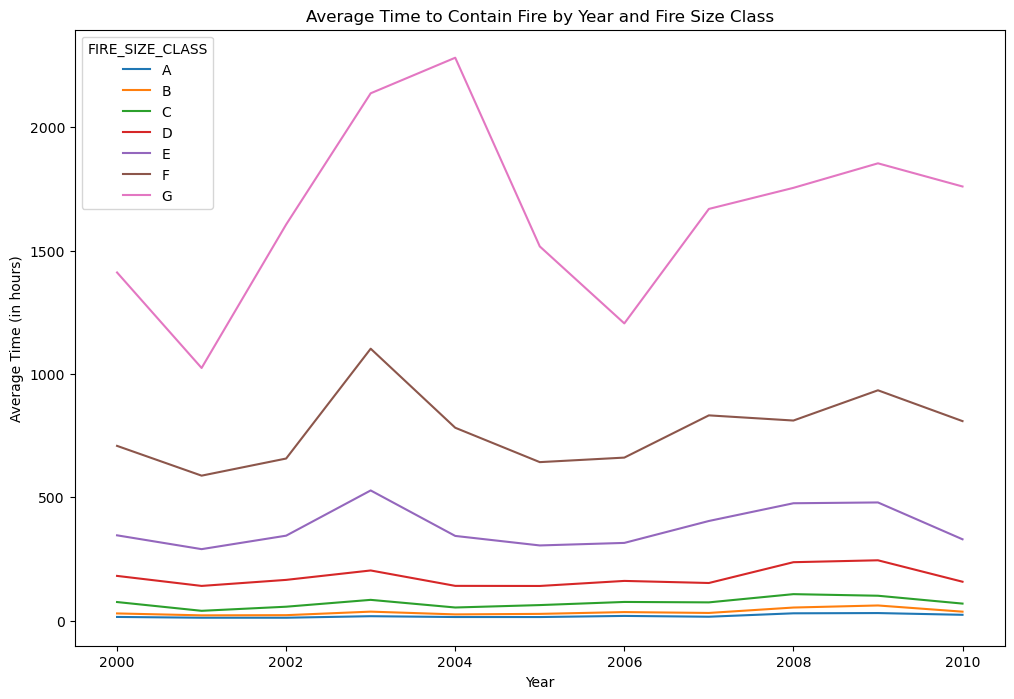

In [21]:
df_fire_contained_average_time_lapse.plot.line(stacked=True, figsize=(12, 8), title='Average Time to Contain Fire by Year and Fire Size Class', xlabel= 'Year',ylabel='Average Time (in hours)')

## Interpretation
- Based on the data from 2000 to 2010, wildfires in 2003 proved to be noticeably challenging to contain.
- Although 2004 saw improvements in containing most wildfires, Class G fires took even more time to contain. 
    - It'd be interesting to investigate as to why this was the case.
- **Containment efforts in 2001,2005, and 2006 could be studied more closely for improvements as the average containment times were the fastest during these years.**

## Future Directions
### Categorical Aspect
- So far, only quantitative measures (Number of Incidents, Fire Size and Time) were used to analyze wildfires.
- However, the cause of wildfires are also interesting areas to perform analysis on. 

In [22]:
df['STAT_CAUSE_DESCR'].unique()

array(['Equipment Use', 'Miscellaneous', 'Debris Burning', 'Children',
       'Arson', 'Smoking', 'Railroad', 'Campfire', 'Lightning',
       'Powerline', 'Structure', 'Missing/Undefined', 'Fireworks'],
      dtype=object)

### Geographical Aspect
- Also, using the map of United States in filtering out wildfires by states can be visually helpful. 
    - Identifying which state experienced most wildfires from 2000 to 2010. 

## Geospatial Data Visualization

In [23]:
# Defining function to create map
def create_map(dictionary, fig, title,color):
  # Create a Choropleth plot using state_counts_dict
  fig.add_trace(go.Choropleth(
      locations=list(dictionary.keys()),
      z=list(dictionary.values()),
      locationmode='USA-states',
      hoverinfo="z+location",
      showscale=True,
      colorscale=color,
      colorbar=dict(
          title="State Counts",
          xanchor="left",
          lenmode="fraction",
          len=0.5
      ),
  ))
  fig.update_geos(scope="usa")
  fig.update_layout(title_text=title)

# Create a MinMaxScaler and define the new range
scaler = MinMaxScaler(feature_range=(1, 10))

In [24]:
# Group by 'State' and get the count of data in each group
count_of_states = df.groupby('STATE').size()

# Fit and transform the count_of_states column
count_of_states = scaler.fit_transform(count_of_states.values.reshape(-1, 1))

# Create a dictionary to map state codes to counts
count_of_states = dict(zip(df['STATE'].unique(), count_of_states.ravel()))

# Create a plot
fig_size_of_fire= go.Figure()

# Call the create_map function to create the map and show data on the map
create_map(count_of_states, fig_size_of_fire, 'Number of Incidents per state','fall')

# Display the map
fig_size_of_fire.show()

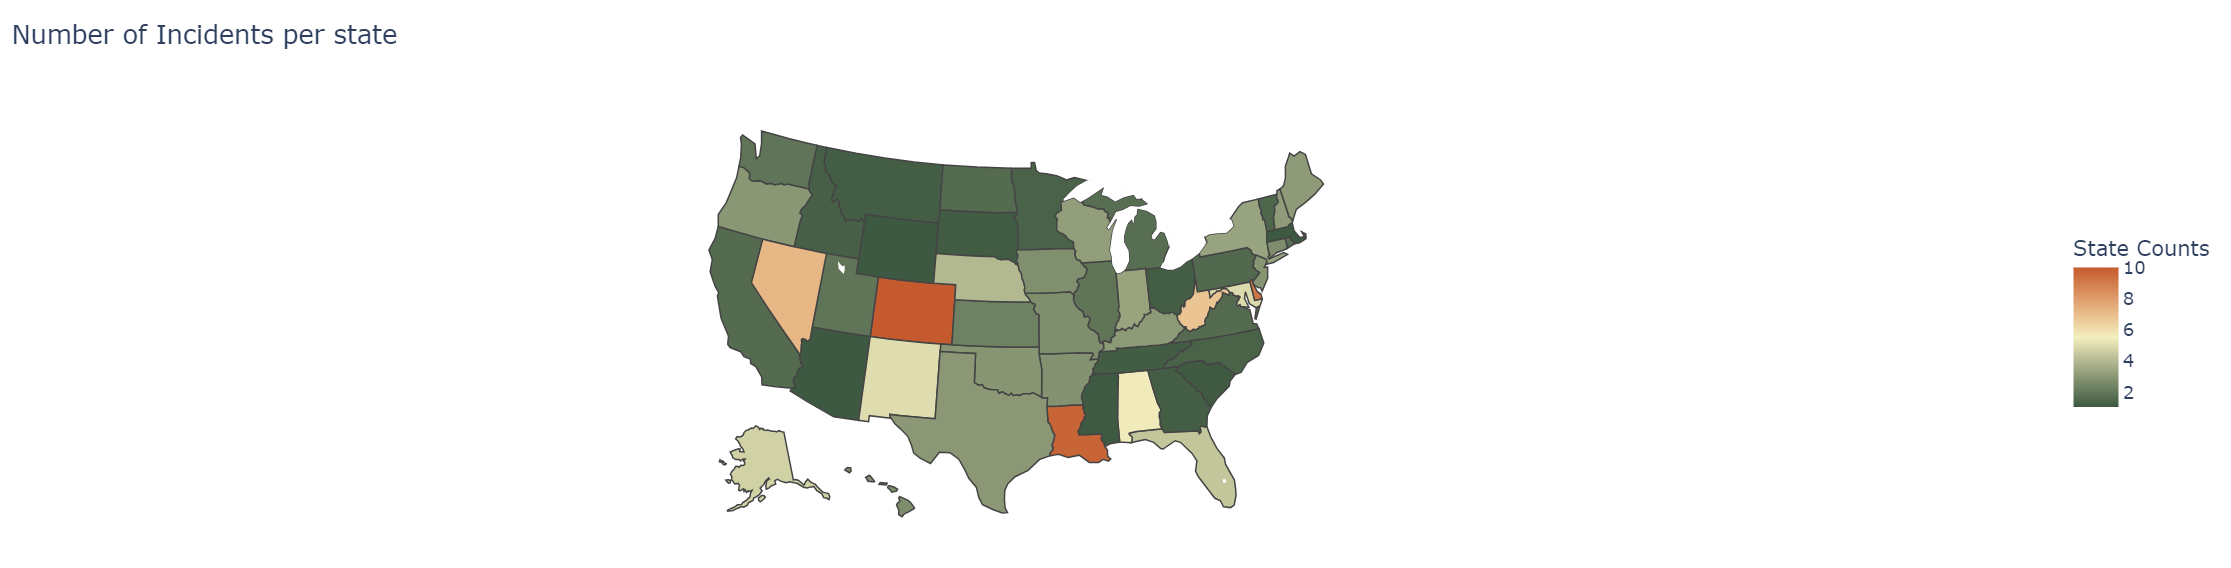

In [25]:
def creating_categorical_maps(column_name, value, figure, title, color):
  sub_df = df[df[column_name] == value][['STATE']]

  # Group by 'State' and get the count of data in each group
  count_of_states = sub_df.groupby('STATE').size()

  # Fit and transform the count_of_states column
  count_of_states = scaler.fit_transform(count_of_states.values.reshape(-1, 1))

  # Create a dictionary to map state codes to counts
  count_of_states = dict(zip(df['STATE'].unique(), count_of_states.ravel()))

  # Call the create_map function to create the map and show data on the map
  create_map(count_of_states, figure, title, color)

In [26]:
# Create a plot
fig_size_A = go.Figure()

# Calling function to create chart
creating_categorical_maps('FIRE_SIZE_CLASS', 'A', fig_size_A, 'Number of Incidents per state for Fire Size A', 'amp')

# Display the map
fig_size_A.show()

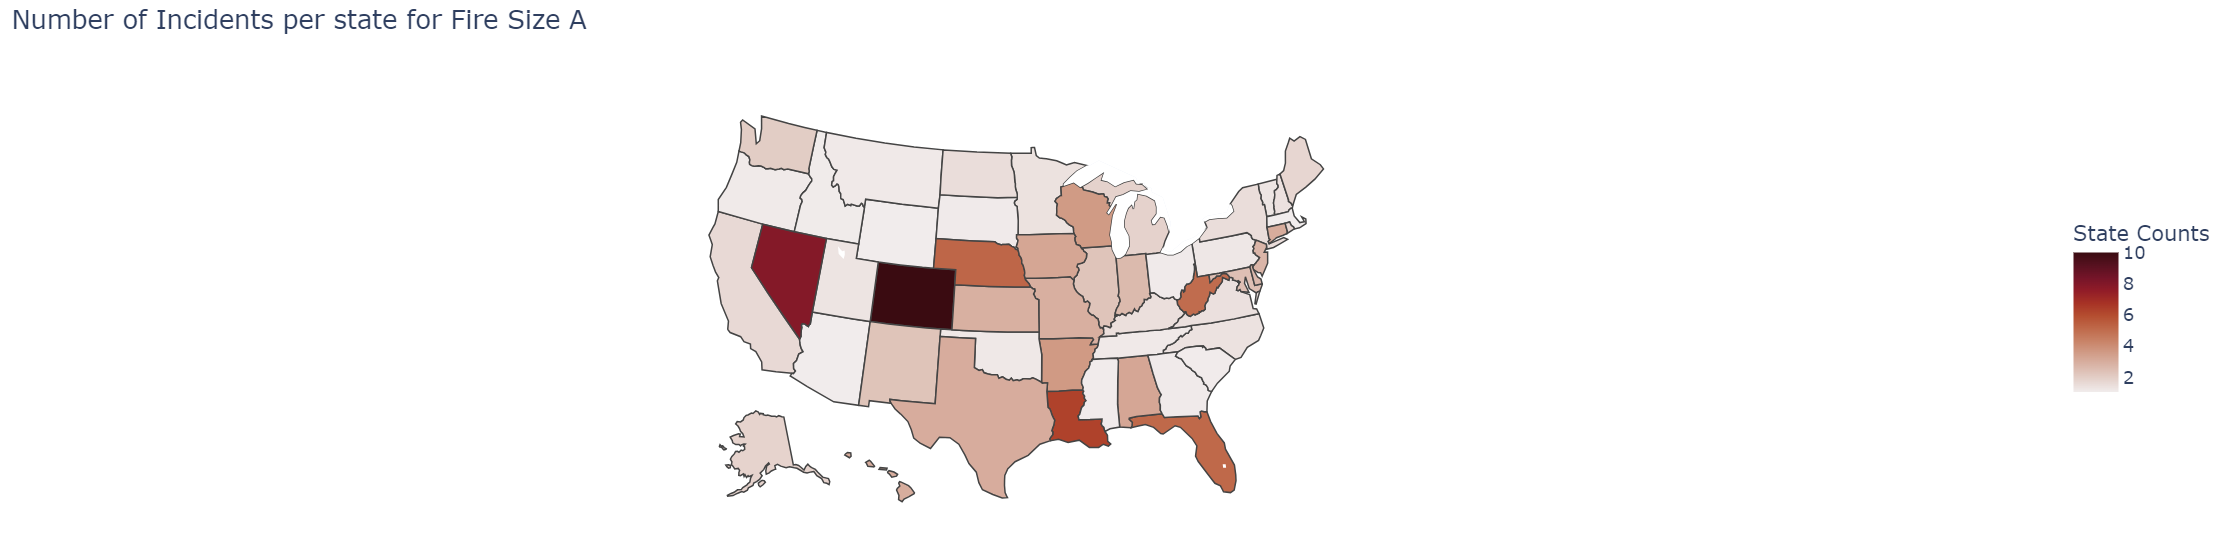

In [27]:
# Create a plot
fig_size_G = go.Figure()

# Calling function to create chart
creating_categorical_maps('FIRE_SIZE_CLASS', 'G', fig_size_G, 'Number of Incidents per state for Fire Size G', 'amp')

# Display the map
fig_size_G.show()

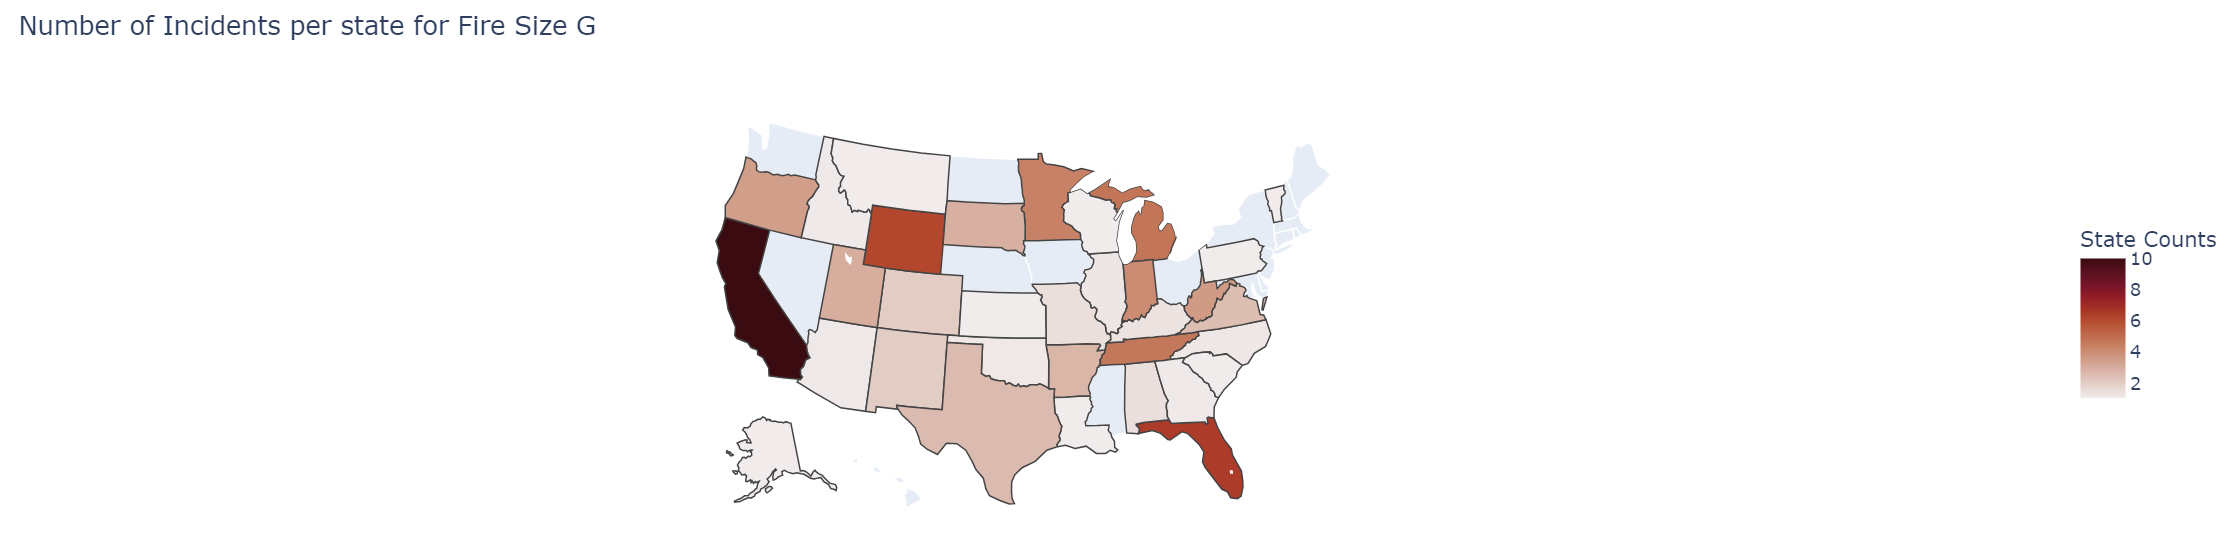

In [28]:
# Create a plot
fig_size_cause_Debris_Burning = go.Figure()

# Calling function to create chart
creating_categorical_maps('STAT_CAUSE_DESCR', 'Debris Burning', fig_size_cause_Debris_Burning, 'Number of Incidents per state caused by Debris Burning', 'blugrn')

# Display the map
fig_size_cause_Debris_Burning.show()

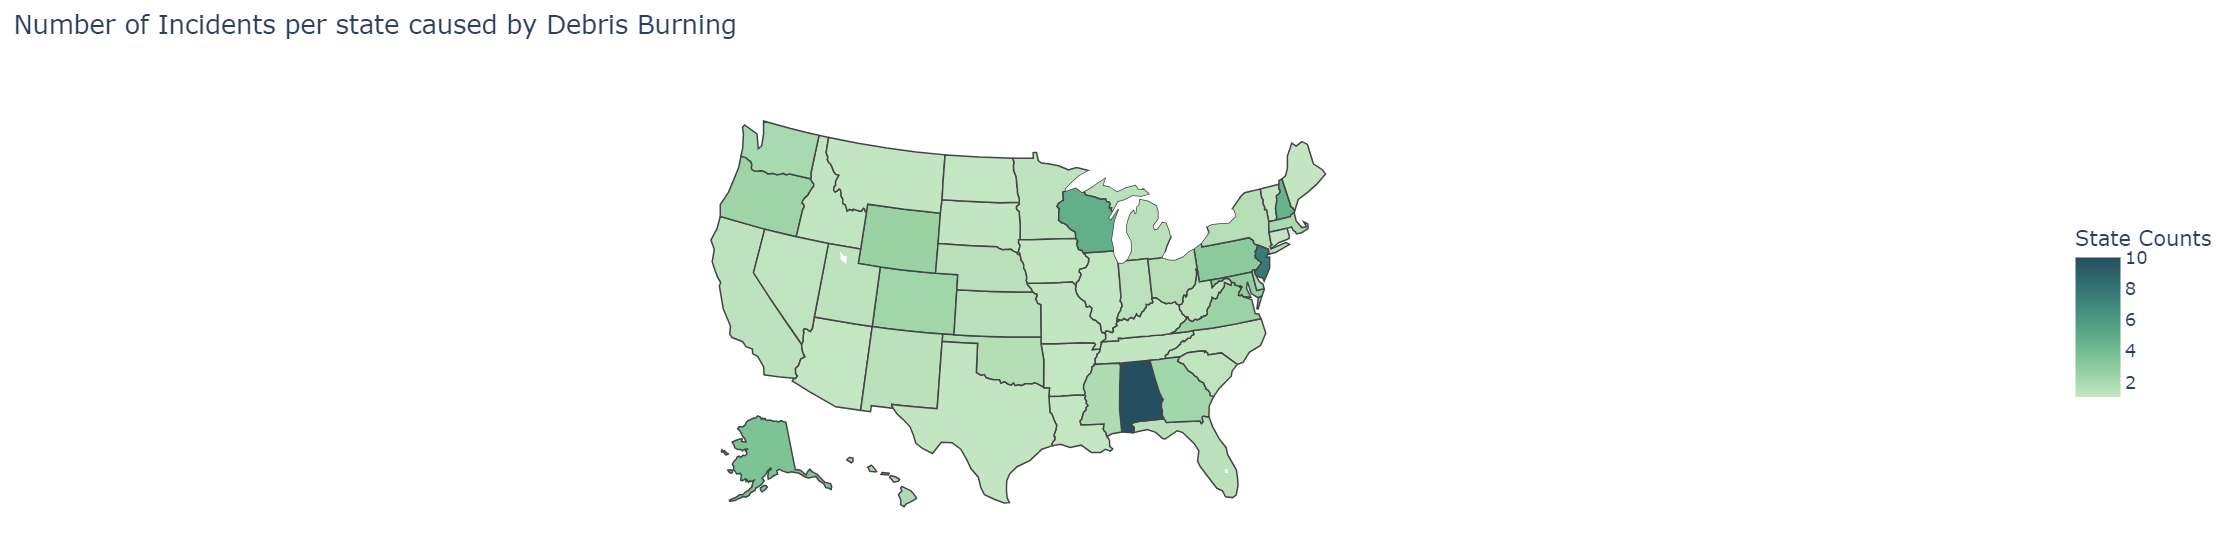

In [29]:
# Create a plot
fig_size_cause_Arson = go.Figure()

# Calling function to create chart
creating_categorical_maps('STAT_CAUSE_DESCR', 'Arson', fig_size_cause_Arson, 'Number of Incidents per state caused by Arson', 'blugrn')

# Display the map
fig_size_cause_Arson.show()

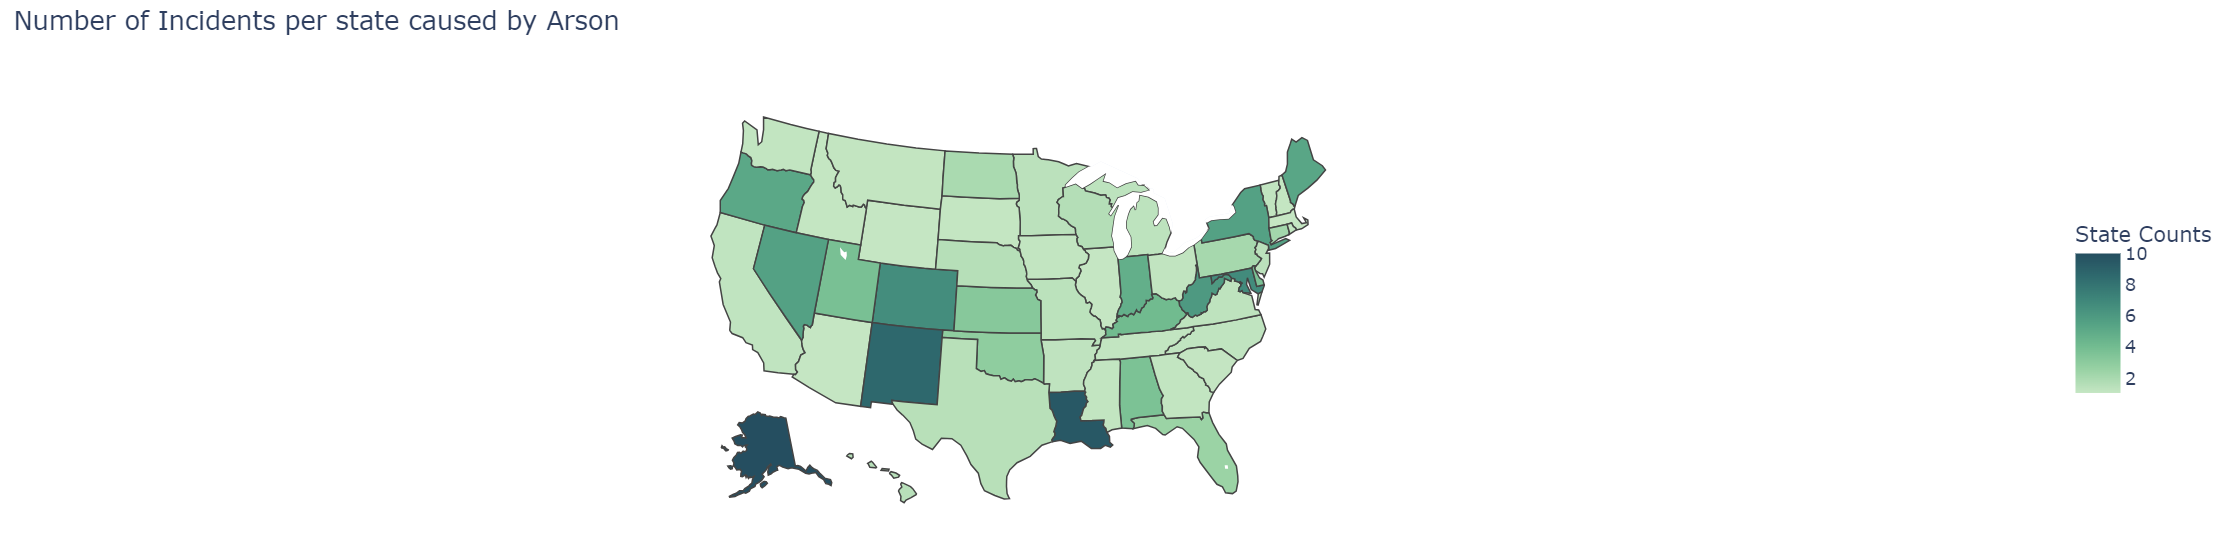